In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



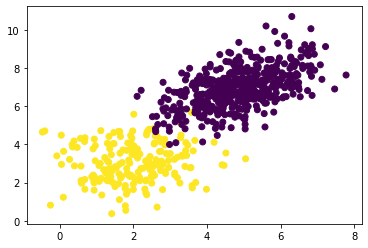

In [34]:
u1=np.array([2,3])
cov_1=np.array([[1,0],
               [0,1]])
x1=np.random.multivariate_normal(u1,cov_1,200)

u2=np.array([5,7])
cov_2=np.array([[1,0.5],
               [0.5,1]])
x2=np.random.multivariate_normal(u2,cov_2,500)

y=np.zeros(700)
y[ :200]=1
x=np.vstack([x1,x2])
plt.scatter(x[ :,0],x[ : ,1],c=y)


In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

#xtrain=xtrain.reshape((-1,1))
print(xtrain.shape)


(560, 2)


In [36]:
def sigmoid(z):
    return 1.0/(1.0+ np.exp(-1*z))

def hypothesis(x,theta,b):
    h=np.dot(x,theta)+b
    return sigmoid(h)

def error(y_true,x,theta,b):
    err=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        err +=(y_true[i]*np.log2(hypothesis(x[i],theta,b)) +  (1-y_true[i])*np.log2(1-hypothesis(x[i],theta,b)))
    
    return -err/m

def grad(y,x,theta,b):
    
    grad_th=np.zeros(theta.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        
        grad_th += (y[i]-hypothesis(x[i],theta,b)*x[i])
        grad_b += (y[i]-hypothesis(x[i],theta,b))
    
    grad_th /=m
    grad_b  /=m
                    
    return [grad_th,grad_b]
                    
def gradientdescent(x,y_true,theta,b,learning_rate):
    err=error(y_true,x,theta,b)
    [grad_th,grad_b]=grad(y,x,theta,b)
    theta= theta + learning_rate*grad_th
    b= b + learning_rate*grad_b
                    
    return err,theta,b                 

In [37]:
def predict(x,theta,b):
    confidence=hypothesis(x,theta,b)
    
    if confidence>0.5:
        return 1
    else:
        return 0
    
def get_acc(xtst,ytst,theta,b):
    ypred=[]
    for i in range(ytst.shape[0]):
        p=predict(xtst[i],theta,b)
        ypred.append(p)
        
    ypred=np.array(ypred)
    return float((ypred==ytst).sum())/ytst.shape[0]       

In [38]:
loss=[]
acc=[]

theta=2*np.random.random((xtrain.shape[1]))
b=5*np.random.random()

for i in range(100):
    l,theta,b=gradientdescent(xtrain,ytrain,theta,b,learning_rate=0.01)
    loss.append(l)
    acc.append(get_acc(xtest,ytest,theta,b))

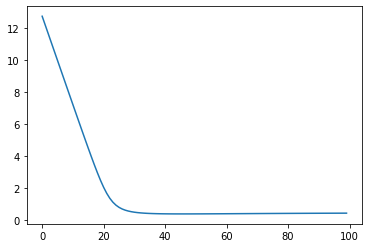

In [39]:
plt.plot(loss)
plt.show()

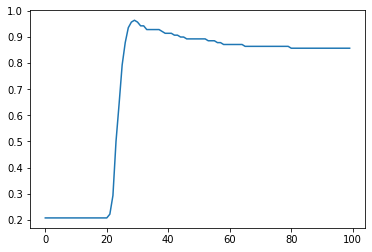

In [40]:
#plt.plot(loss)
plt.plot(acc)
plt.show()

In [41]:
print(acc)

[0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.20714285714285716, 0.22142857142857142, 0.29285714285714287, 0.5, 0.6428571428571429, 0.7928571428571428, 0.8785714285714286, 0.9357142857142857, 0.9571428571428572, 0.9642857142857143, 0.9571428571428572, 0.9428571428571428, 0.9428571428571428, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9214285714285714, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9071428571428571, 0.9071428571428571, 0.9, 0.9, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0

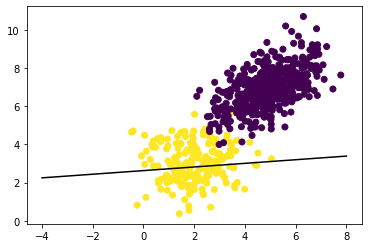

In [42]:

#decision data
plt.scatter(x[ :,0],x[ : ,1],c=y)

x=np.linspace(-4,8,10)
y=-(theta[0]*x + b)/theta[1]

plt.plot(x,y,color='k')
plt.show()
